# Introduction



This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.




Questions that can analyised from this data set


>1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.

>2. ‘Neighborhood’ indicates the location of the hospital.

>3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>4. ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



In [1]:
# Importing necessary packages:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
sns.set()

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install seaborn==0.11.0 

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Creating & setting a customized palette:
custom_palette = ['#118ab2', '#ef476f', '#06d6a0', '#ffd166', '#073b4c']
sns.set_palette(custom_palette)

In [4]:
# The current color palette:
sns.color_palette()

[(0.06666666666666667, 0.5411764705882353, 0.6980392156862745),
 (0.9372549019607843, 0.2784313725490196, 0.43529411764705883),
 (0.023529411764705882, 0.8392156862745098, 0.6274509803921569),
 (1.0, 0.8196078431372549, 0.4),
 (0.027450980392156862, 0.23137254901960785, 0.2980392156862745)]

In [5]:
# Defining our main colors:
b = custom_palette[0]
r = custom_palette[1]
g = custom_palette[2]


# Data Wrangling



General Properties

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable....

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.

In [7]:
# checking the data shape:
df.shape

(110527, 14)

In [8]:
# Exploring a slice from raw data:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Checking column labels, missing values, dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Checking for missing values:
df.isna().sum().any()

False

the code above show that there is no missing values.

In [11]:
# checking for duplicated rows:
df.duplicated().any()

False

the code above show that there is no duplicated rows.

In [12]:
# Checling for irrational vales:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00



### Data Cleaning
what to clean....
- Making a copy from raw data
- Dropping columns with age == 0:
- Converting id columns into str dtype
- Renaming some columns:
- Creating a new clumns for time delta and the days passed since scheduling
- Dropping columns with the days passed since scheduling < 0:
- Generating new columns for hours
- Creating a new ordinal dtype for weekdays
- Creating a binary columns for type of the day:
- Creating a new ordinal dtype for months
- Converting gender col into categorical dtype
- Converting gender & no-show columns into 0/1 dtype
 

In [13]:
# Making a copy from raw data:
df2 = df.copy()

In [14]:
# Dropping columns with age == 0:
index_to_drop = df2.query("Age <= 0").index
df2.drop(index=index_to_drop, inplace=True)

In [15]:
# Converting id columns into str dtype:
df2['PatientId'] = df2['PatientId'].astype(str)
df2['AppointmentID'] = df2['AppointmentID'].astype(str)

In [16]:
# Renaming some columns:
df2.rename(columns={'Hipertension': 'Hypertension',
                   'ScheduledDay': 'ScheduledDate',
                   'AppointmentDay': 'AppointmentDate'}, inplace=True)

# Putting date columns in the correct format:
df2['ScheduledDate'] = pd.to_datetime(df2['ScheduledDate'])
df2['AppointmentDate'] = pd.to_datetime(df2['AppointmentDate'])

In [17]:
# Creating a new columns for time delta and the days passed since scheduling:
df2['TimeDelta'] = df2['AppointmentDate'] - df2['ScheduledDate']
df2['HowManyDays'] = df2['TimeDelta'].dt.days + 1

In [18]:
# Dropping columns with the days passed since scheduling < 0:
index_to_drop = df2.query("HowManyDays < 0").index
df2.drop(index=index_to_drop, inplace=True)

In [19]:
# Generating new columns for hours:
df2['ScheduledHour'] = pd.to_datetime(df2['ScheduledDate']).dt.strftime('%H')

# Creating a new ordinal dtype for hours:
hours = sorted(df2['ScheduledHour'].unique())
hours_cat = CategoricalDtype(categories=hours, ordered=True)
df2['ScheduledHour'] = df2['ScheduledHour'].astype(hours_cat)

In [20]:
# Creating a new ordinal dtype for weekdays:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_cat = CategoricalDtype(categories=weekdays, ordered=True)

# Generating new columns for weekdays:
df2['ScheduledDay'] = pd.to_datetime(df2['ScheduledDate']).dt.strftime('%A').astype(weekdays_cat)
df2['AppointmentDay'] = pd.to_datetime(df2['AppointmentDate']).dt.strftime('%A').astype(weekdays_cat)

In [21]:
# Creating a binary columns for type of the day:
df2['ScheduledDayWeekend'] = df2['ScheduledDay'].map(lambda x: 1 if x in weekdays[-2:] else 0)
df2['AppointmentDayType'] = df2['AppointmentDay'].map(lambda x: 1 if x in weekdays[-2:] else 0)

In [22]:
# Creating a new ordinal dtype for months:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_cat = CategoricalDtype(categories=months, ordered=True)

# enerating new columns for months:
df2['ScheduledMonth'] = pd.to_datetime(df2['ScheduledDate']).dt.strftime('%B').astype(months_cat)
df2['AppointmentMonth'] = pd.to_datetime(df2['AppointmentDate']).dt.strftime('%B').astype(months_cat)

In [23]:
# Converting gender col into categorical dtype:
df2['Gender'] = df2['Gender'].astype('category')

In [24]:
# Converting gender & no-show columns into 0/1 dtype:
df2['Male'] = (df2['Gender'] == 'M').astype('int8')
df2['Female'] = (df2['Gender'] == 'F').astype('int8')
df2['No-show'] = (df2['No-show'] == 'Yes').astype('int8')

<a id='eda'></a>
## Exploratory Data Analysis



In [25]:
# Checking the shape of clean data:
df2.shape

(106982, 25)

In [26]:
# Exploring a slice from clean data:
df2.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,HowManyDays,ScheduledHour,ScheduledDay,AppointmentDay,ScheduledDayWeekend,AppointmentDayType,ScheduledMonth,AppointmentMonth,Male,Female
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,18,Friday,Friday,0,0,April,April,0,1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,16,Friday,Friday,0,0,April,April,1,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,16,Friday,Friday,0,0,April,April,0,1
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,17,Friday,Friday,0,0,April,April,0,1
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,16,Friday,Friday,0,0,April,April,0,1


In [27]:
# Exploring columns:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 25 columns):
PatientId              106982 non-null object
AppointmentID          106982 non-null object
Gender                 106982 non-null category
ScheduledDate          106982 non-null datetime64[ns, UTC]
AppointmentDate        106982 non-null datetime64[ns, UTC]
Age                    106982 non-null int64
Neighbourhood          106982 non-null object
Scholarship            106982 non-null int64
Hypertension           106982 non-null int64
Diabetes               106982 non-null int64
Alcoholism             106982 non-null int64
Handcap                106982 non-null int64
SMS_received           106982 non-null int64
No-show                106982 non-null int8
TimeDelta              106982 non-null timedelta64[ns]
HowManyDays            106982 non-null int64
ScheduledHour          106982 non-null category
ScheduledDay           106982 non-null category
AppointmentDay         106982 

In [28]:
# Exploring summary stats:
df2.describe().select_dtypes(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age,106982.0,38.316315,22.466023,1.0,19.0,38.0,56.0,115.0
Scholarship,106982.0,0.101036,0.301377,0.0,0.0,0.0,0.0,1.0
Hypertension,106982.0,0.203782,0.402811,0.0,0.0,0.0,0.0,1.0
Diabetes,106982.0,0.074246,0.262172,0.0,0.0,0.0,0.0,1.0
Alcoholism,106982.0,0.031407,0.174416,0.0,0.0,0.0,0.0,1.0
Handcap,106982.0,0.022957,0.164064,0.0,0.0,0.0,0.0,4.0
SMS_received,106982.0,0.323279,0.467730,0.0,0.0,0.0,1.0,1.0
No-show,106982.0,0.202604,0.401942,0.0,0.0,0.0,0.0,1.0
HowManyDays,106982.0,10.167290,15.263631,0.0,0.0,4.0,14.0,179.0
ScheduledDayWeekend,106982.0,0.000206,0.014339,0.0,0.0,0.0,0.0,1.0


In [29]:
# Calculating the probability of a patient not to show in time:
df2['No-show'].mean()

0.20260417640350714

In [30]:
# Defining a function to replace tick numbers with proportions:
def normalize_ticks(data, cols, step=0.1):

    max_prop = data[cols].value_counts(normalize=True)[0]
        
    new_ticks = np.arange(0, max_prop+step, step)
    new_tick_pos = new_ticks * len(data)
    new_tick_labels = [str(t)[:3] for t in new_ticks]
    
    return new_tick_pos, new_tick_labels

In [31]:
pos, labs = normalize_ticks(data=df2, cols='No-show')

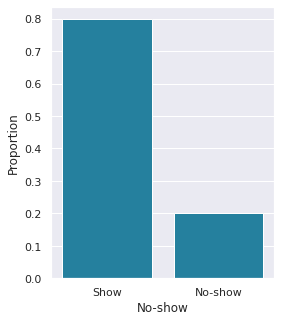

In [32]:
# Plotting the proportion of yes/no in No-show column:
fig = plt.figure(figsize=(4, 5))
ax = sns.countplot(data=df2, x='No-show', color=b)
ax.set_xticklabels(labels=['Show', 'No-show'])
ax.set_ylabel('Proportion')
ax.set_yticks(pos)
ax.set_yticklabels(labs);

In [33]:
df2['Age'].describe()

count    106982.000000
mean         38.316315
std          22.466023
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

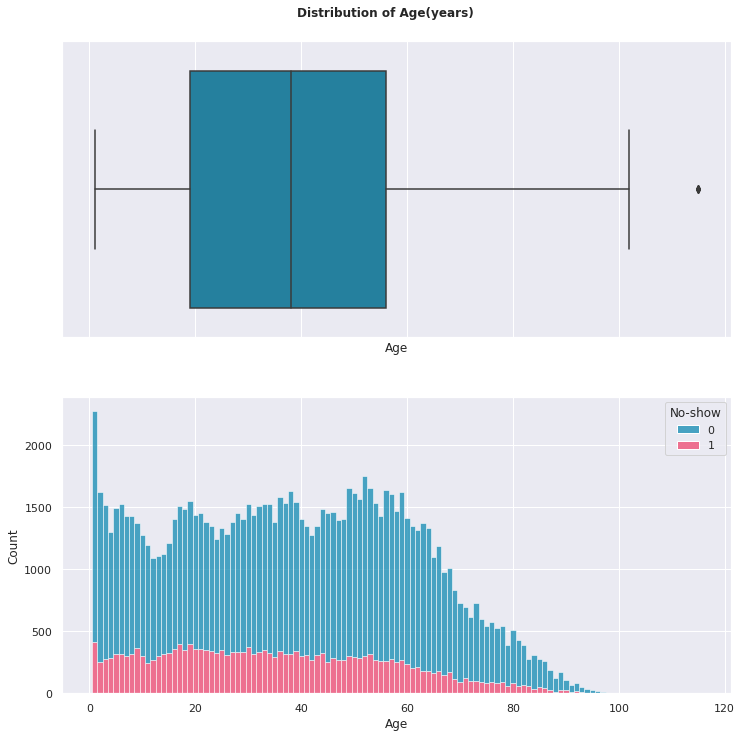

In [34]:
# Plotting the distribution of age:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
fig.suptitle('Distribution of Age(years)', fontweight='bold', y=0.92)

sns.boxplot(data=df2, x='Age', ax=ax1)

sns.histplot(data=df2, x='Age', discrete=True, hue='No-show', palette=[b, r], multiple='stack', ax=ax2);

Above chart shows 2 different genres plotted over the age from 0 to 120. two colours are showing two genres. chart show how count decreased as the age passed.

In [35]:
cols_to_plot = ['Male', 'Female', 'Scholarship', 'Hypertension', 'Diabetes',
                'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledDayWeekend']

In [36]:
def cond_prob(data, p_col, cond, reverse=False):
    
    # Rescaling the data accordingly:
    if not reverse:
        df2_ = data.query(f"{cond} == 1")
    else:
        df2_ = data.query(f"{cond} == 0")
    
    # Calculating conditional probability:
    prob = round(df2_[p_col].mean() * 100, 2)
    
    return df2_, prob

# probability for male, female,Scholarship,Alcoholism and SMS_received to be no show

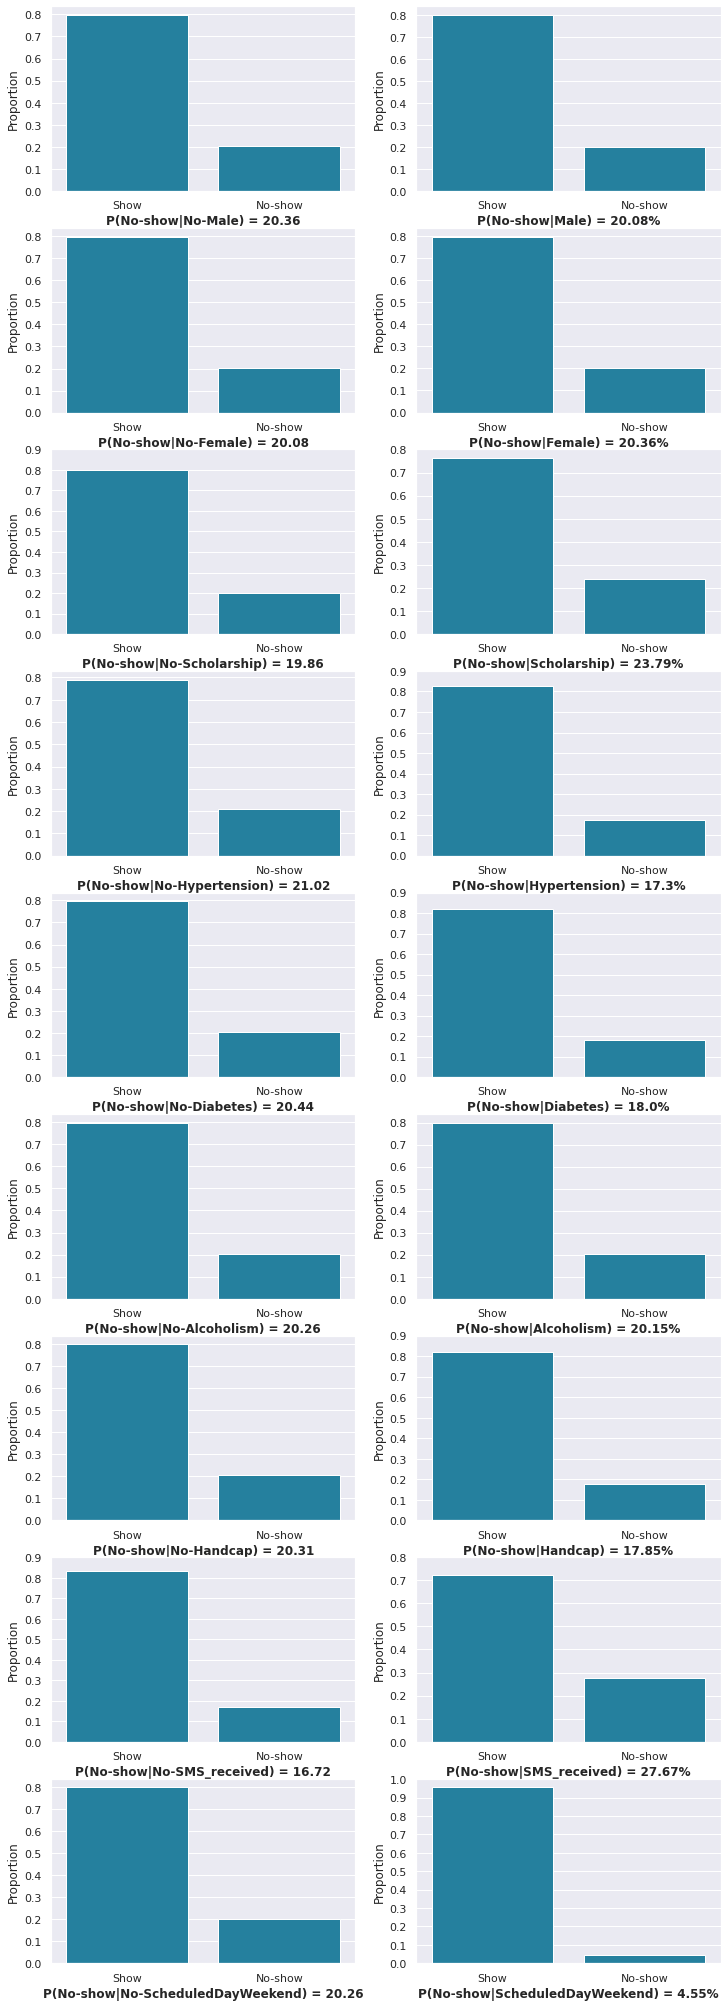

In [37]:
# Plotting conditional probability:
fig, axs = plt.subplots(len(cols_to_plot), 2, figsize=(12, 36))

for col, ax in zip(cols_to_plot, axs[:,0]):
    
    df2_, prob = cond_prob(df2, 'No-show', col, reverse=True)  
    pos, labs = normalize_ticks(data=df2_, cols='No-show')
    
    sns.countplot(data=df2_, x='No-show', color=b, ax=ax)
    ax.set_xlabel(f'P(No-show|No-{col}) = {prob}', fontweight='bold')
    ax.set_xticklabels(labels=['Show', 'No-show'])
    ax.set_yticks(pos)
    ax.set_yticklabels(labs)
    ax.set_ylabel('Proportion')
    
for col, ax in zip(cols_to_plot, axs[:,1]):
    
    df2_, prob = cond_prob(df2, 'No-show', col)  
    pos, labs = normalize_ticks(data=df2_, cols='No-show')
    
    sns.countplot(data=df2_, x='No-show', color=b, ax=ax)
    ax.set_xlabel(f'P(No-show|{col}) = {prob}%', fontweight='bold')
    ax.set_xticklabels(labels=['Show', 'No-show'])
    ax.set_yticks(pos)
    ax.set_yticklabels(labs)
    ax.set_ylabel('Proportion');

# is hour of schedule affect the probability of no show?

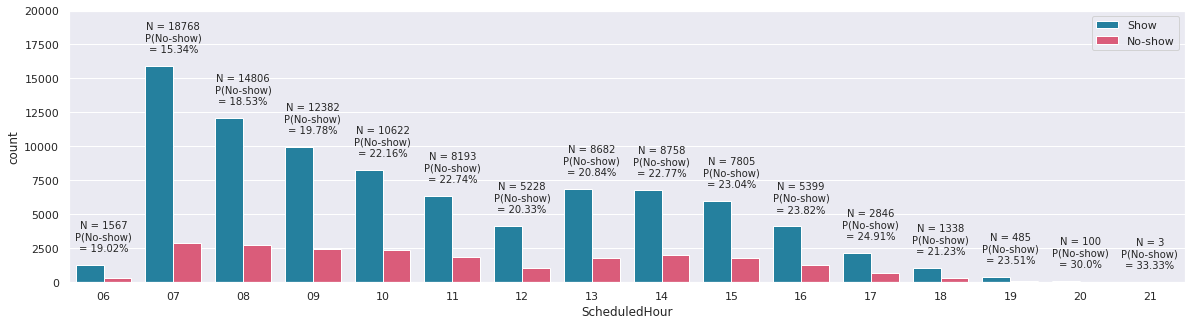

In [38]:
# Plotting number of consultations per hour:
fig = plt.figure(figsize=(20, 5))
ax = sns.countplot(data=df2, x='ScheduledHour', hue='No-show', palette={1: r, 0: b})
ax.set_ylim(0, 20000)
ax.legend(loc=1, labels=['Show', 'No-show'])

# Annotating th plot with conditional probability:
for i in range(len(hours)):
    
    hour = hours[i]
    df2_ = df2.query(f"ScheduledHour == @hour")
    
    n = len(df2_)
    if n == 0:
        p = 0
    else:
        p = round(df2_['No-show'].mean() * 100, 2)
    s = f'N = {n}\nP(No-show)\n= {p}%'
        
    y = n - df2_['No-show'].sum()
    x = i
        
    ax.text(s=s, x=x, y=y+1000, fontdict={'ha': 'center'})

In [39]:
# Calculating the proportion of consultations per weekday:
df2['ScheduledDay'].value_counts(normalize=True)[weekdays] * 100

Monday       20.795087
Tuesday      23.629209
Wednesday    22.004636
Thursday     16.375652
Friday       17.174852
Saturday      0.020564
Sunday        0.000000
Name: ScheduledDay, dtype: float64

# is days of the weak affect the probability of no show?

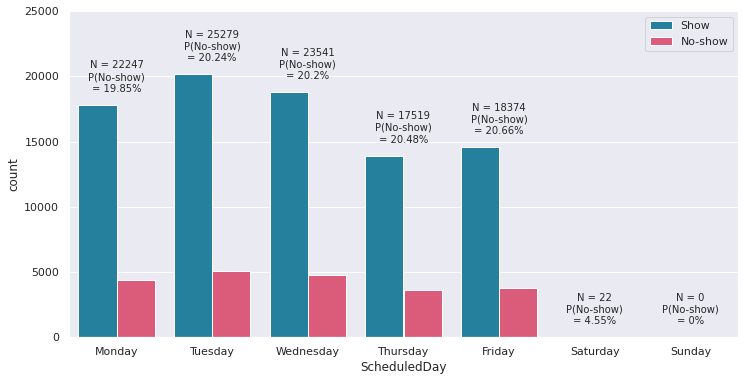

In [40]:
# Plotting number of consultations per weekday:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df2, x='ScheduledDay', hue='No-show', palette={True: r, False: b})
ax.set_ylim(0, 25000)
ax.legend(loc=1, labels=['Show', 'No-show'])

# Annotating th eplot with conditional probability:
for i in range(len(weekdays)):
    
    day = weekdays[i]
    df2_ = df2.query(f"ScheduledDay == @day")
    
    n = len(df2_)
    if n == 0:
        p = 0
    else:
        p = round(df2_['No-show'].mean() * 100, 2)
    s = f'N = {n}\nP(No-show)\n= {p}%'
        
    y = n - df2_['No-show'].sum()
    x = i
        
    ax.text(s=s, x=x, y=y+1000, fontdict={'ha': 'center'})

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0